# Characteristics Model
## Setup

In [1]:
import numpy as np
import torch
from torchvision import models
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as T


from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

from train import *
from data_utils import *

%load_ext autoreload
%autoreload 2

FINAL = True
HIGH_RES = False

USE_GPU = True
dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

torch.backends.cudnn.benchmark = True

print('use cuda = ', torch.cuda.is_available())
print('using device:', device)

use cuda =  True
using device: cuda


In [2]:
## Load the data
if HIGH_RES:
    fname = "bolete.h5"
else:
    fname = "bolete_lowres.h5"
data = load_bolete_data(fname)

ItemsViewHDF5(<HDF5 file "bolete.h5" (mode r)>)


In [3]:
# Get Train and Test Split

X_train, X_test, Y_train, Y_test, y_train, y_test = get_train_and_test(data, 'bolete-characteristics')

print(X_train.shape)
print(Y_train.shape)
print(y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(y_test.shape)

num_classes = Y_train.shape[1]
print(num_classes)

(1307, 3, 512, 512)
(1307, 38)
(1307,)
(561, 3, 512, 512)
(561, 38)
(561,)
38


In [4]:
## Download pretrained model(s)
model = models.googlenet(pretrained=True)
# model = models.resnext101_32x8d(pretrained=True)
# model = models.alexnet(pretrained=True)

## Transfer Learn with cross validation


In [5]:
# def loss_fn(scores, true_y):
#     probs = torch.sigmoid(scores)
#     if_true = true_y * torch.log(probs)
#     if_false = (1-true_y) * torch.log(1 - probs)
#     loss = -1 * torch.sum(if_true + if_false)
#     return loss

def pred_fn(scores):
    outputs = torch.sigmoid(scores)
    preds = outputs > 0.5
    return preds

num_classes = Y_train.shape[1]

for param in model.parameters():
    param.requires_grad = False
 
fc_in_feats = model.fc.in_features
model.fc = nn.Linear(fc_in_feats, num_classes)

# optimizer = optim.Adam(model.fc.parameters(), betas=(.5, .999), lr=1e-2)

optimizer = optim.RMSprop(
    model.parameters(),
    lr=5e-4,
    momentum=0.1,
    alpha=0.99
    )

# transform = T.Compose([T.ToTensor()])

batch_size = 128
num_epochs = 40
num_folds = 1

torch.manual_seed(0)
history = cross_val(
    X_train=X_train,
    Y_train=Y_train,
    y_train=y_train,
    model=model,
    folds=num_folds,
    optimizer=optimizer,
    loss_fn=nn.BCEWithLogitsLoss(),
    pred_fn=pred_fn,
    batch_size=batch_size,
    num_epochs=num_epochs,
    show_every=1,
    num_classes=num_classes,
    device=device,
    dtype=dtype,
)

CV model on:  cuda
CV Fold:  1
Training model on:  cuda
Iter: 0
train Loss: 0.6011 Acc: 0.6778
Iter: 1
val Loss: 0.5821 Acc: 0.7038
Iter: 2
train Loss: 0.5695 Acc: 0.7077
Iter: 3
val Loss: 0.5762 Acc: 0.7058
Iter: 4
train Loss: 0.5646 Acc: 0.7088
Iter: 5
val Loss: 0.5734 Acc: 0.7050
Iter: 6
train Loss: 0.5614 Acc: 0.7110
Iter: 7
val Loss: 0.5711 Acc: 0.7054
Iter: 8
train Loss: 0.5585 Acc: 0.7129
Iter: 9
val Loss: 0.5690 Acc: 0.7057
Iter: 10
train Loss: 0.5551 Acc: 0.7143
Iter: 11
val Loss: 0.5674 Acc: 0.7071
Iter: 12
train Loss: 0.5534 Acc: 0.7150
Iter: 13
val Loss: 0.5663 Acc: 0.7081
Iter: 14
train Loss: 0.5519 Acc: 0.7165
Iter: 15
val Loss: 0.5651 Acc: 0.7077
Iter: 16
train Loss: 0.5495 Acc: 0.7180
Iter: 17
val Loss: 0.5639 Acc: 0.7076
Iter: 18
train Loss: 0.5478 Acc: 0.7197
Iter: 19
val Loss: 0.5630 Acc: 0.7076
Iter: 20
train Loss: 0.5461 Acc: 0.7202
Iter: 21
val Loss: 0.5623 Acc: 0.7087
Iter: 22
train Loss: 0.5442 Acc: 0.7215
Iter: 23
val Loss: 0.5617 Acc: 0.7105
Iter: 24
train Los

{'train_loss': [[0.6010894434303758, 0.5695002202211955, 0.5646381602332923, 0.5613769215830205, 0.55853347510242, 0.5550840891149056, 0.5533836764582036, 0.5518502978046546, 0.549539517700387, 0.5478148806608465, 0.5460743250744194, 0.5441541265928004, 0.5432648371566425, 0.5425538588653911, 0.5406464253030896, 0.5400976271720594, 0.5382649175288005, 0.5380038617330305, 0.5358851056920284, 0.5355552111516159, 0.5340797653608915, 0.5335795532288163, 0.531881199812775, 0.5319150100769608, 0.5301091671845559, 0.5292359532636889, 0.5296856359146428, 0.5283577579915809, 0.5265599737327065, 0.5264228859586578, 0.5258188232280421, 0.525142626984838, 0.5242492293056689, 0.5225126689130609, 0.5222741761561216, 0.5214074544359052, 0.5212432094738244, 0.5213561160427531, 0.5191404745624396, 0.5187102521435496]], 'val_loss': [[0.582145260490534, 0.5761542793448645, 0.573363330073029, 0.5711424960434892, 0.5689689758169743, 0.567392328768286, 0.5662845282154229, 0.5651466072970674, 0.5638805741572

True

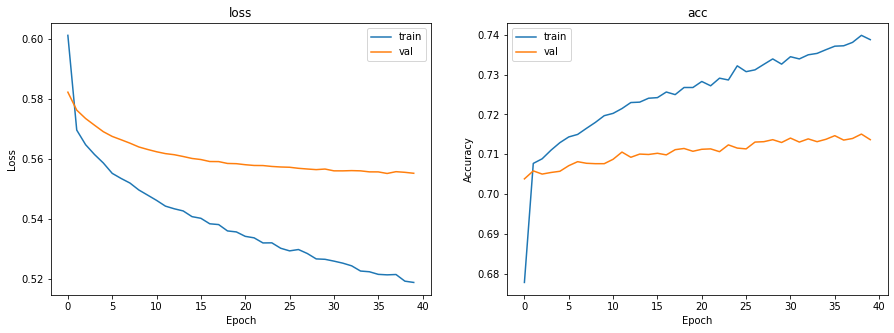

In [6]:
fig, axes = plt.subplots(1, 2, figsize=[15,5], sharex=False, sharey=False)
axes[0].set_ylabel("Loss")
axes[1].set_ylabel("Accuracy")

plotnum = 0

phase = ["train", "val"]
for s in ["loss", "acc"]:
    for a in phase:
        axes[plotnum].set_title(s)
        axes[plotnum].set_xlabel("Epoch")
        # for i in range(len(history[a+'_'+s])):
        #     axes[plotnum].plot(history[a+'_'+s][i])
        axes[plotnum].plot(np.mean(history[a+'_'+s], axis=0))
        axes[plotnum].legend(phase)
    plotnum += 1

print(history)
save_history_data(history, "characteristic_"+fname, num_folds=num_folds, edibility=False)

## Train on all the data

In [7]:
if FINAL:
    model = models.googlenet(pretrained=True)
    num_classes = Y_train.shape[1]

    for param in model.parameters():
        param.requires_grad = False
    
    fc_in_feats = model.fc.in_features
    model.fc = nn.Linear(fc_in_feats, num_classes)

    optimizer = optim.RMSprop(
        model.parameters(),
        lr=5e-4,
        momentum=0.1,
        alpha=0.99
        )
    
    dataloader_tr = get_loader(X_train, Y_train, batch_size)   
    dataloader_val = get_loader(X_test, Y_test, batch_size)
    dataloaders = {"train":dataloader_tr, "val":dataloader_val}
    
    torch.manual_seed(0)
    train_acc_history, train_loss_history, val_acc_history, val_loss_history = train_model(
        model=model,
        optimizer=optimizer,
        dataloaders=dataloaders,
        loss_fn=nn.BCEWithLogitsLoss(),
        pred_fn=pred_fn,
        num_epochs=num_epochs,
        show_every=1,
        device=device,
        dtype=dtype,
        num_classes=num_classes,
    )
    history_final = {
        "train_acc": [train_acc_history],
        "train_loss": [train_loss_history],
        "val_acc": [val_acc_history],
        "val_loss": [val_loss_history],
    }
    save_history_data(history_final, "characteristic_final_"+fname, edibility=False, num_folds=1)

Training model on:  cuda
Iter: 0
train Loss: 0.5948 Acc: 0.6846
Iter: 1
val Loss: 0.5829 Acc: 0.7010
Iter: 2
train Loss: 0.5676 Acc: 0.7084
Iter: 3
val Loss: 0.5746 Acc: 0.7018
Iter: 4
train Loss: 0.5629 Acc: 0.7112
Iter: 5
val Loss: 0.5706 Acc: 0.7049
Iter: 6
train Loss: 0.5595 Acc: 0.7130
Iter: 7
val Loss: 0.5684 Acc: 0.7064
Iter: 8
train Loss: 0.5566 Acc: 0.7155
Iter: 9
val Loss: 0.5665 Acc: 0.7064
Iter: 10
train Loss: 0.5544 Acc: 0.7160
Iter: 11
val Loss: 0.5650 Acc: 0.7067
Iter: 12
train Loss: 0.5522 Acc: 0.7172
Iter: 13
val Loss: 0.5635 Acc: 0.7076
Iter: 14
train Loss: 0.5497 Acc: 0.7188
Iter: 15
val Loss: 0.5623 Acc: 0.7080
Iter: 16
train Loss: 0.5478 Acc: 0.7212
Iter: 17
val Loss: 0.5616 Acc: 0.7086
Iter: 18
train Loss: 0.5461 Acc: 0.7207
Iter: 19
val Loss: 0.5603 Acc: 0.7079
Iter: 20
train Loss: 0.5443 Acc: 0.7224
Iter: 21
val Loss: 0.5597 Acc: 0.7086
Iter: 22
train Loss: 0.5437 Acc: 0.7217
Iter: 23
val Loss: 0.5590 Acc: 0.7089
Iter: 24
train Loss: 0.5420 Acc: 0.7243
Iter: 25


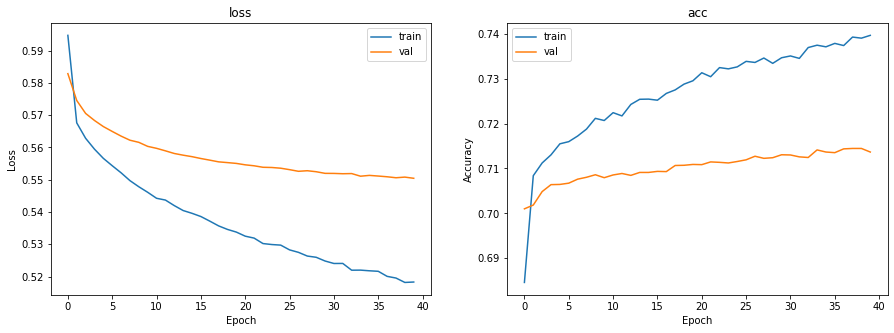

In [8]:
fig, axes = plt.subplots(1, 2, figsize=[15,5], sharex=False, sharey=False)
axes[0].set_ylabel("Loss")
axes[1].set_ylabel("Accuracy")

plotnum = 0

phase = ["train", "val"]
for s in ["loss", "acc"]:
    for a in phase:
        axes[plotnum].set_title(s)
        axes[plotnum].set_xlabel("Epoch")
        # for i in range(len(history[a+'_'+s])):
        #     axes[plotnum].plot(history[a+'_'+s][i])
        axes[plotnum].plot(np.mean(history_final[a+'_'+s], axis=0))
        axes[plotnum].legend(phase)
    plotnum += 1

## Evaluate 

In [9]:
if FINAL:
    X, Y, y = X_test, Y_test, y_test
else:
    X, Y, y = get_val(X_train, Y_train, y_train)

scores, y_pred, y_true, y_labels = evaluate(
    X,  # images
    Y,  # output
    y,  # labels
    model,
    Y.shape[1],
    pred_fn,
    device=device,
    transform=None,
)
save_raw_eval_data(scores, y_pred, y_true, y_labels, "characteristic_"+fname)

Evaluating model on:  cuda


True